# Initial Analysis on Cancer Waiting Times in Scotland

Prepared by C.A.Oldnall

## Set-Up

Below I have created a function which takes in a region code, cancer type and a splitting quarter (which is useful for when trying to look at the affect of COVID). This will then return x and y which are the quarter-eligible pairing pre splitting quarter and then a and b are the corresponding pair for after the splitting pair.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fullData = pd.read_csv("31DayData.csv")
myData = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

In [2]:
def ReigonTypeQuarterSelector(reigonCode, cancerType, quarterSplit):
    typeData = myData[myData['CancerType']== cancerType]
    reigonalData = typeData[typeData['HB'] == reigonCode]
    
    aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', 'NumberOfEligibleReferrals31DayStandard': 'sum', 'NumberOfEligibleReferralsTreatedWithin31Days': 'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)
        
    Qs = reigonalData.iloc[:,[0]]
    QsReset = Qs.reset_index()
    Index = min(QsReset.index[QsReset['Quarter'] == quarterSplit].tolist())
    
    PreQ = reigonalData.iloc[:Index,:]
    PostQ = reigonalData.iloc[Index:,:]
    
    x = PreQ["Quarter"]
    y = PreQ["NumberOfEligibleReferrals31DayStandard"]
    a = PostQ["Quarter"]
    b = PostQ["NumberOfEligibleReferrals31DayStandard"]
    
    return x, y, a, b

Some useful notes on the formatting and selection of data:

$\textbf{reigonCode}$:

Format should be given as: 'S080000NN'

Input 'NN' is from the set, $\{ 15, 16, 17, 19, 20, 22, 24, 25, 26, 28, 29, 30, 31, 32 \}$.


$\textbf{cancerType}$:

Format should be given as: 'Cancer Type'

Input is from the set; 

'Cervical', 'Lymphoma', 'Melanoma', 'Ovarian', 'Head & Neck', 'Breast', 'Colorectal', 'Upper GI', 'Urological', 'Lung', 'All Cancer Types'.

$\textbf{quarterSplit}$:

Format should be given as: 'YYYYQN' (eg. '2019Q3')

Input is from '2012Q1' upto '2021Q3'. Pick the quarter from which you want to split $\textbf{UPTO}$.

------------------------------------
## Graphing Reigons

Below we have a some code and a plot which shows us how each reigon's cancer cases (for all cancer types combined) have developed over time. We create a break at the second quarter of 2020 to mark the start of the pandemic. 

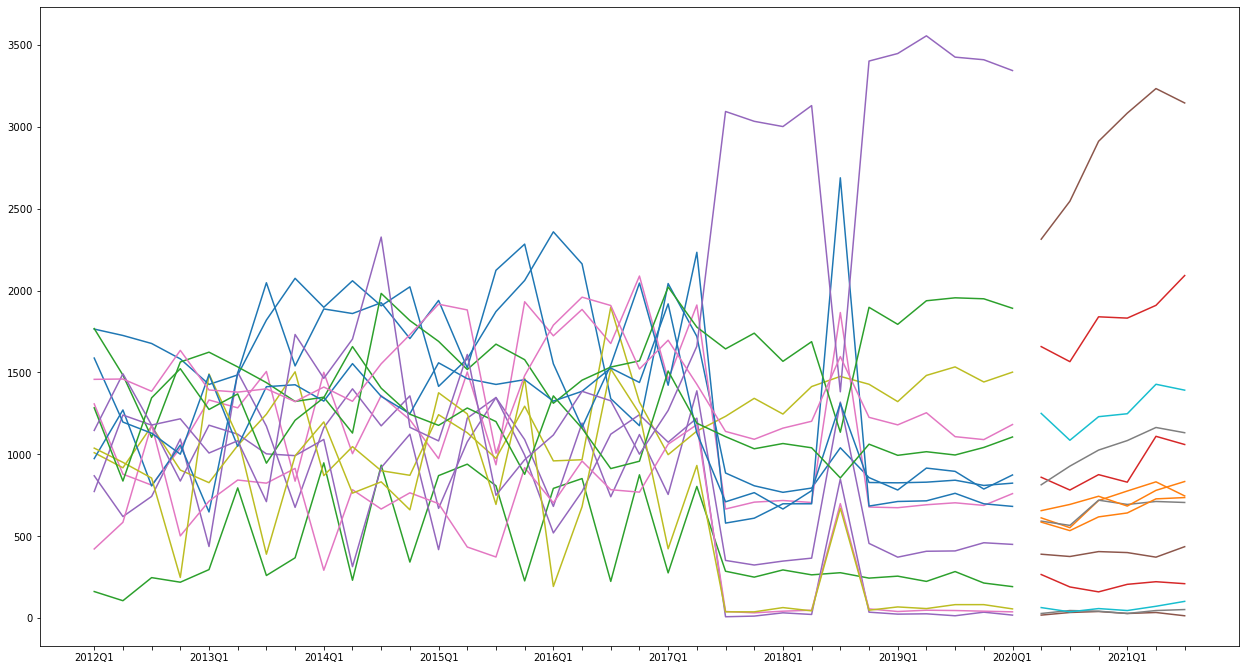

In [4]:
Reigons = ['S08000015', 'S08000016', 'S08000017', 'S08000019', 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, d1 = plt.subplots(1, 1, sharey=True)

for i in Reigons:
    x, y, a, b = ReigonTypeQuarterSelector(i, 'All Cancer Types', '2020Q2')
    d1.plot(x, y)
    d1.plot(a, b)

every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()

# Addition
by Sofie Verhees

This part also looks at the health board that refers the patients. However, this part looks at the 62-day standard for all cancer types for all regions separately and together. Instead of splitting pre- and post pandemic, this part just indicates where the pandemic started.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
fullData_31 = pd.read_csv("31DayData.csv")
myData_31 = fullData_31[['Quarter', 'HB', 'HBT', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

fullData_62 = pd.read_csv("62DayData.csv")
myData_62 = fullData_62[['Quarter', 'HB', 'HBT', 'CancerType','NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days']]

In [6]:
def ReigonTypeQuarterSelector_edit(myData, reigonCode, cancerType, rows):
    typeData = myData[myData['CancerType']== cancerType]
    typeData.to_csv('typeData')
    noaddedData = typeData[typeData['HB'] != 'S92000003']
    noaddedData.to_csv('noaddedData')
    reigonalData = noaddedData[noaddedData['HBT'] == reigonCode]
    reigonalData.to_csv('regionalData')
    
    aggregation_functions = {'Quarter':'first','HBT': 'first', 'CancerType': 'first', rows[0]: 'sum', rows[1]: 'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)
    
    reigonalData.to_csv('finalData')
    
    x = reigonalData["Quarter"]
    y = reigonalData[rows[0]]
    y2 = reigonalData[rows[1]]
    
    return x, y, y2

In [7]:
def ReigonTypeQuarterSelector(myData, reigonCode, cancerType, rows):
    typeData = myData[myData['CancerType']== cancerType]
    reigonalData = typeData[typeData['HB'] == reigonCode]
    
    aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', rows[0]: 'sum', rows[1]: 'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)

    x = reigonalData["Quarter"]
    y = reigonalData[rows[0]]
    y2 = reigonalData[rows[1]]
    
    return x, y, y2

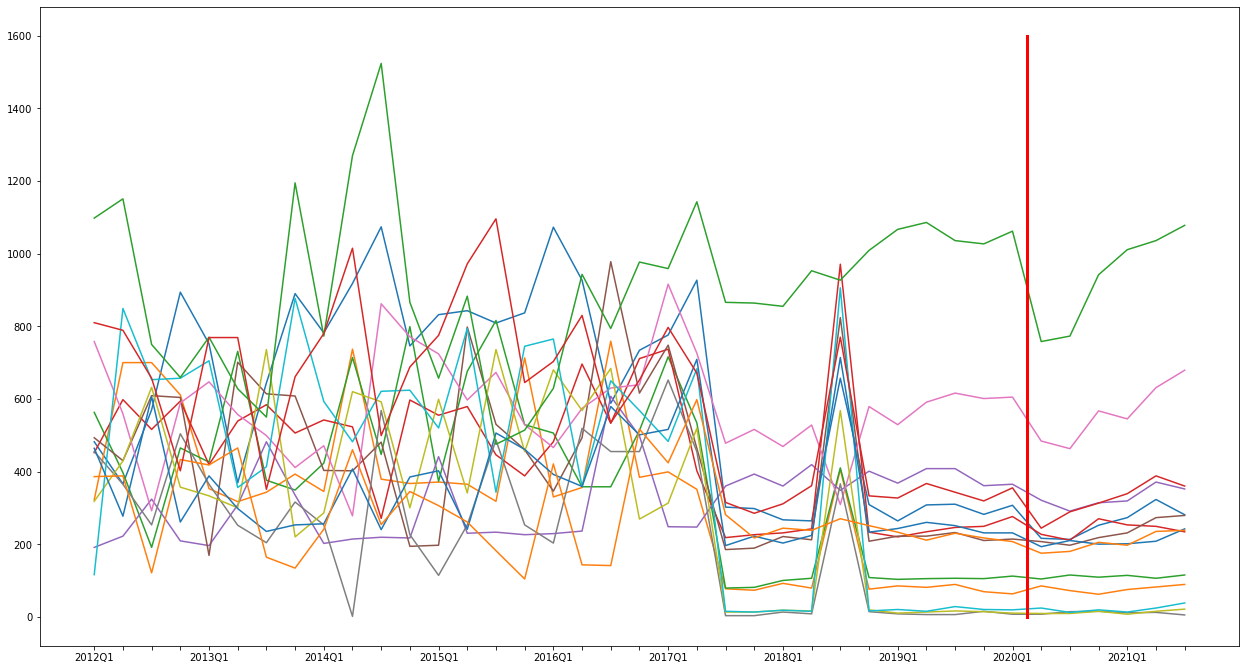

In [8]:
Reigons = ['S08000015', 'S08000016', 'S08000017', 'S08000019', 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, d1 = plt.subplots(1, 1, sharey=True)

for i in Reigons:
    x, y, y2 = ReigonTypeQuarterSelector(myData_62, i, 'All Cancer Types', ['NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days'])
    d1.plot(x, y)

d1.plot([32.5,32.5], [0,1600], color='r', linewidth=3)

every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()

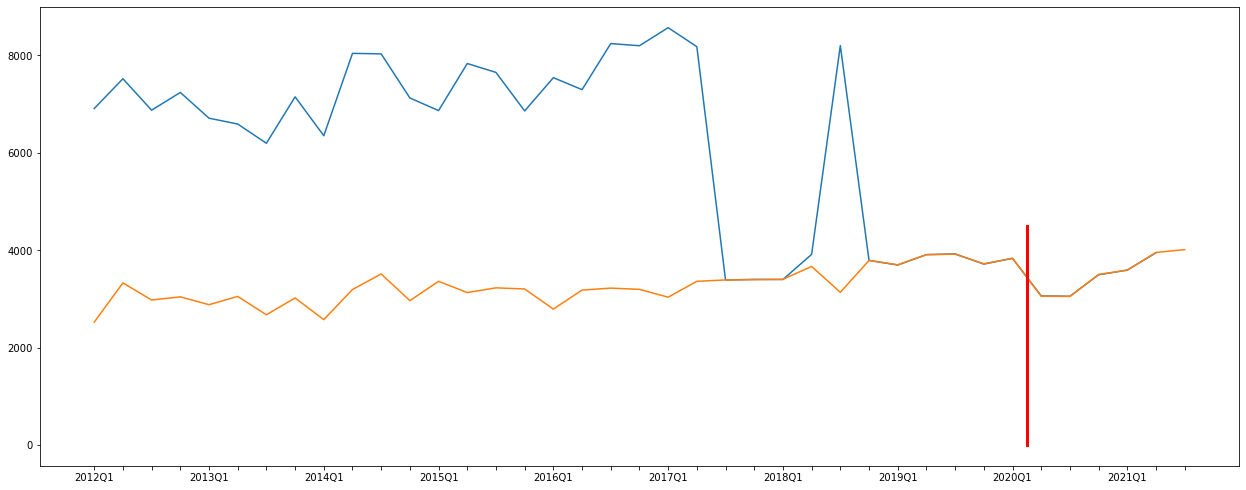

In [9]:
Reigons = ['SB0801','S08000015', 'S08000016', 'S08000017', 'S08000019', 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']
# note that also add together SB0801, otherwise S92000003 adds more together than this one

fig, d1 = plt.subplots(1, 1, sharey=True)
all_regions = 0

for i in Reigons:
    x, y, y2 = ReigonTypeQuarterSelector_edit(myData_62, i, 'All Cancer Types', ['NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days'])
    all_regions += y

d1.plot(x, all_regions)
    
x, y, y2 = ReigonTypeQuarterSelector(myData_62, 'S92000003', 'All Cancer Types', ['NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days'])
d1.plot(x, y)


d1.plot([32.5,32.5], [0,4500], color='r', linewidth=3)

every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

#d1.set_xlim(left=20)
        
fig.set_size_inches(18.5, 8, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()

This seems to be almost the same as in the latest report from PHS about cancer waiting times (https://publichealthscotland.scot/media/10777/2021-12-14-cwt-report.pdf), except for 2018 Q3, not sure if this has been changed since the report came out, december 2021, or if there is a difference somewhere.

Now let's look at the number of treated patients normalized by the number of eligible patients:

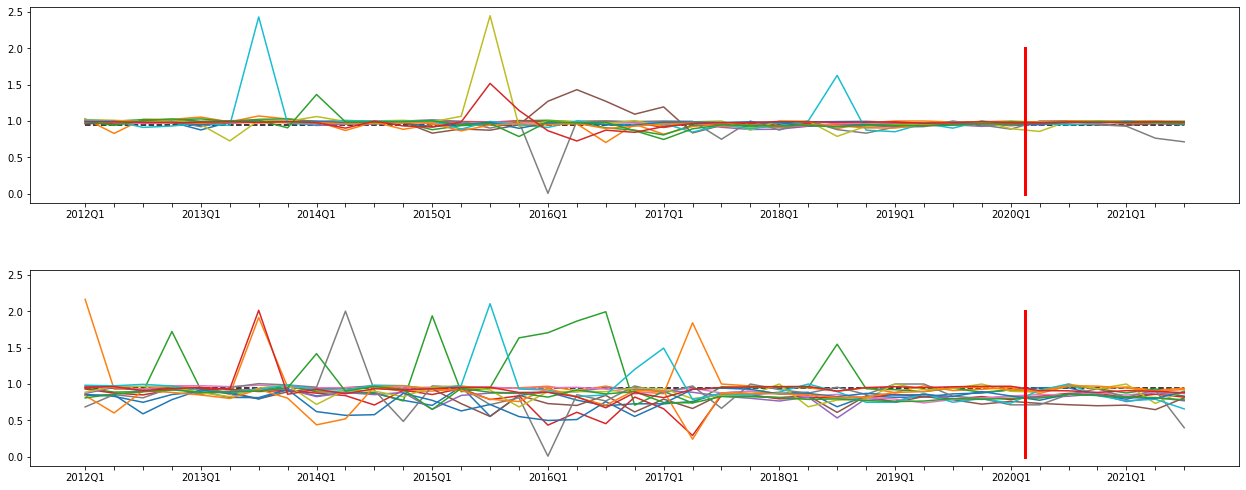

In [10]:
Reigons = ['S08000015', 'S08000016', 'S08000017', 'S08000019', 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, (d1, d2) = plt.subplots(2, 1, sharey=True)

d1.plot([0,38], [0.95,0.95], 'k--')
d2.plot([0,38], [0.95,0.95], 'k--')

for i in Reigons:
    x, y, y2 = ReigonTypeQuarterSelector(myData_31, i, 'All Cancer Types', ['NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days'])
    d1.plot(x,y2/y) 
    x, y, y2 = ReigonTypeQuarterSelector(myData_62, i, 'All Cancer Types', ['NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days'])
    d2.plot(x,y2/y) 

d1.plot([32.5,32.5], [0,2], color='r', linewidth=3)
d2.plot([32.5,32.5], [0,2], color='r', linewidth=3)

every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
for n, label in enumerate(d2.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.set_size_inches(18.5, 8, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()

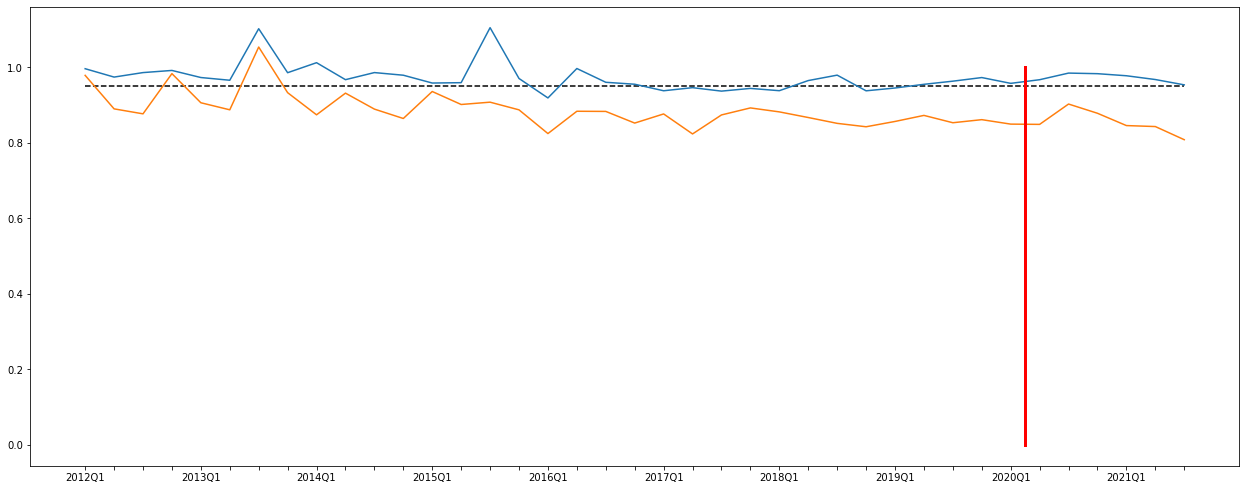

In [11]:
Reigons = ['S08000015', 'S08000016', 'S08000017', 'S08000019', 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, d1 = plt.subplots(1, 1, sharey=True)

avg_regions_31 = 0
avg_regions_62 = 0

for i in Reigons:
    x, y, y2 = ReigonTypeQuarterSelector(myData_31, i, 'All Cancer Types', ['NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days'])
    avg_regions_31 += y2/y
    x, y, y2 = ReigonTypeQuarterSelector(myData_62, i, 'All Cancer Types', ['NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days'])
    avg_regions_62 += y2/y

d1.plot([0,38], [0.95,0.95], 'k--')

d1.plot(x, avg_regions_31/len(Reigons))
d1.plot(x, avg_regions_62/len(Reigons))

d1.plot([32.5,32.5], [0,1], color='r', linewidth=3)

every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
fig.set_size_inches(18.5, 8, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()

Again, this looks very much like figure 1 in the PHS latest cancer waiting times report, except for a couple weird outliers. No idea where those come from.